In [162]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [163]:
import io

In [164]:
from google.colab import files
uploaded = files.upload()

Saving wyy_n.csv to wyy_n.csv


In [165]:
df = pd.read_csv(io.BytesIO(uploaded['wyy_n.csv']))
print(df)

           Date  Open  High  Low  Close  Adj Close  Average
0      1/4/2010   7.5   7.8  7.2    7.2        7.2     7.38
1      1/5/2010   7.4   7.4  7.2    7.3        7.3     7.32
2      1/6/2010   7.2   7.3  7.1    7.2        7.2     7.20
3      1/7/2010   7.2   7.4  7.0    7.2        7.2     7.20
4      1/8/2010   7.1   7.5  7.0    7.4        7.4     7.28
...         ...   ...   ...  ...    ...        ...      ...
2635  6/23/2020   7.3   7.3  6.6    6.7        6.7     6.92
2636  6/24/2020   7.0   8.6  6.7    7.0        7.0     7.26
2637  6/25/2020   6.9   7.1  6.9    6.9        6.9     6.94
2638  6/26/2020   6.9   6.9  6.5    6.6        6.6     6.70
2639  6/29/2020   6.5   7.2  6.4    6.9        6.9     6.78

[2640 rows x 7 columns]


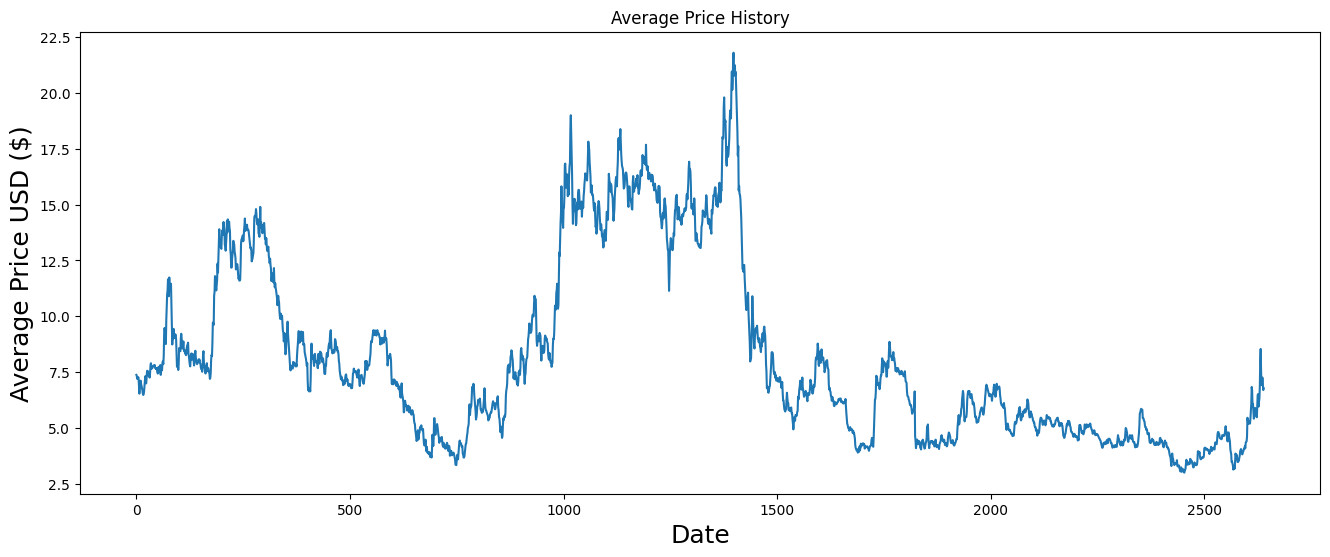

In [166]:
plt.figure(figsize=(16,6))
plt.title('Average Price History')
plt.plot(df['Average'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Average Price USD ($)', fontsize=18)
plt.show()

In [167]:
data = df.filter(['Average'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * 0.95 ))
window_size = 60
training_data_len

2508

In [168]:
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
print('scaled_data.shape', len(dataset))
scaled_data

scaled_data.shape 2640


array([[-0.18719353],
       [-0.20206044],
       [-0.23179425],
       ...,
       [-0.29621752],
       [-0.35568516],
       [-0.33586261]])

In [169]:
train_data = scaled_data[0: int(training_data_len)]
x_train = []
y_train = []

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    if i <= window_size + 1:
      print('x_train', x_train)
      print('\n y_train', y_train)
      print()

x_train = np.array(x_train)
y_train = np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print('x_train.shape', x_train.shape)

x_train [array([-0.18719353, -0.20206044, -0.23179425, -0.23179425, -0.21197171,
       -0.21692734, -0.30117316, -0.39533025, -0.32099571, -0.29621752,
       -0.2516168 , -0.28630625, -0.31108443, -0.33090698, -0.35568516,
       -0.39533025, -0.41019716, -0.40028589, -0.37055207, -0.3061288 ,
       -0.24666116, -0.20206044, -0.27639498, -0.28135062, -0.21197171,
       -0.1425928 , -0.1425928 , -0.14754844, -0.17728226, -0.20206044,
       -0.18719353, -0.21692734, -0.16737098, -0.08312517, -0.05834699,
       -0.12277026, -0.11285898, -0.10790335, -0.10790335, -0.0880808 ,
       -0.08312517, -0.0880808 , -0.0880808 , -0.07816953, -0.11285898,
       -0.11285898, -0.12277026, -0.11285898, -0.12277026, -0.15745971,
       -0.17232662, -0.16737098, -0.09799208, -0.15745971, -0.09799208,
       -0.11781462, -0.07816953, -0.18719353, -0.12277026, -0.12772589])]

 y_train [-0.13763716519823901]

x_train [array([-0.18719353, -0.20206044, -0.23179425, -0.23179425, -0.21197171,
       -0.

In [170]:
print(x_train.shape[1])

60


In [171]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
!pip install layers

In [172]:
import tensorflow as tf

In [173]:
def build_lstm_model():
  input = tf.keras.layers.Input(shape = (x_train.shape[1], 1), name = 'input')
  x = tf.keras.layers.Bidirectional(LSTM(128, return_sequences = True))(input)
  x = tf.keras.layers.Bidirectional(LSTM(64, return_sequences = False, dropout = 0.5))(x)
  output = tf.keras.layers.Dense(1, name = "last_dense")(x)
  model = tf.keras.Model(inputs = input, outputs = output)
  return model

LSTM_model = build_lstm_model()
LSTM_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 60, 1)]           0         
                                                                 
 bidirectional_16 (Bidirect  (None, 60, 256)           133120    
 ional)                                                          
                                                                 
 bidirectional_17 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 last_dense (Dense)          (None, 1)                 129       
                                                                 
Total params: 297601 (1.14 MB)
Trainable params: 297601 (1.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [174]:
epochs = 50
batch_size = 32
early_stopping_patience = 20

LSTM_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
price = LSTM_model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/50
77/77 [==============================] - 48s 291ms/step - loss: 0.0849
Epoch 2/50
77/77 [==============================] - 21s 274ms/step - loss: 0.0217
Epoch 3/50
77/77 [==============================] - 20s 259ms/step - loss: 0.0189
Epoch 4/50
77/77 [==============================] - 21s 270ms/step - loss: 0.0161
Epoch 5/50
77/77 [==============================] - 23s 293ms/step - loss: 0.0147
Epoch 6/50
77/77 [==============================] - 20s 258ms/step - loss: 0.0144
Epoch 7/50
77/77 [==============================] - 21s 272ms/step - loss: 0.0125
Epoch 8/50
77/77 [==============================] - 21s 277ms/step - loss: 0.0123
Epoch 9/50
77/77 [==============================] - 20s 259ms/step - loss: 0.0121
Epoch 10/50
77/77 [==============================] - 22s 282ms/step - loss: 0.0122
Epoch 11/50
77/77 [==============================] - 21s 275ms/step - loss: 0.0109
Epoch 12/50
77/77 [==============================] - 20s 260ms/step - loss: 0.0112
Epoch 13/50
7

In [175]:
test_data = scaled_data[training_data_len - window_size: ]
print('len(test_data): ', len(test_data))

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(window_size, len(test_data)):
  x_test.append(test_data[i - window_size:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = LSTM_model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

len(test_data):  192
5/5 [==============================] - 2s 60ms/step


0.31969439032529107

<ipython-input-176-8f188311654f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = predictions


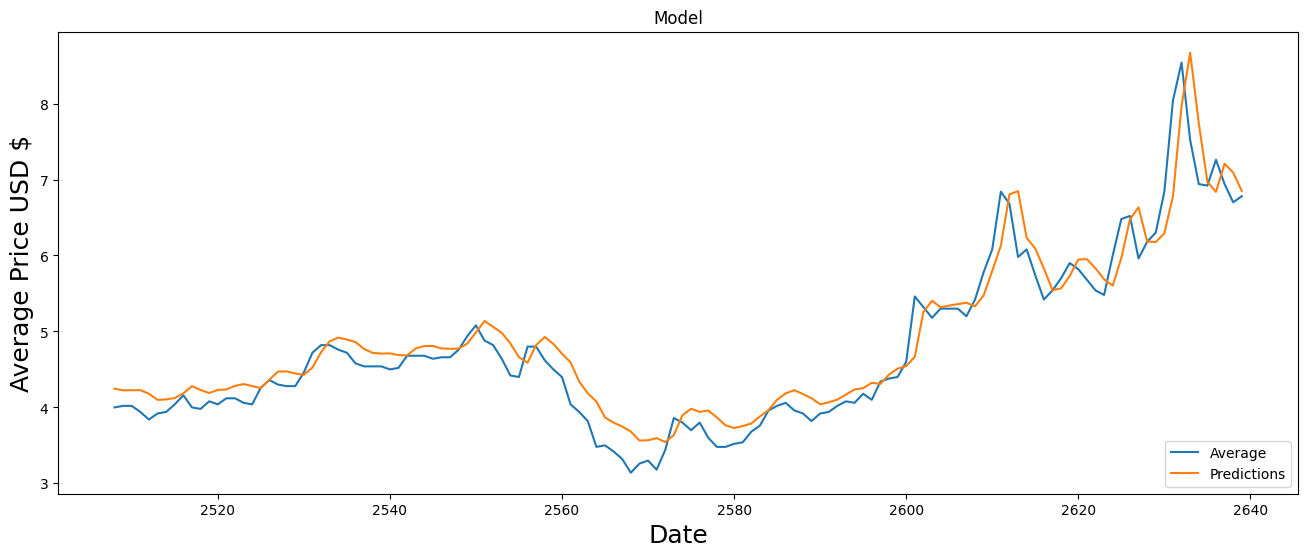

In [176]:
train = data[: training_data_len]
test = data[training_data_len: ]
test['Predictions'] = predictions

plt.figure(figsize = (16, 6))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Average Price USD $', fontsize = 18)
plt.plot(test[['Average', 'Predictions']])
plt.legend(['Average', 'Predictions'], loc = 'lower right')
plt.show()

In [177]:
test[:]

,Average,Predictions
2508,4.00,4.246513
2509,4.02,4.224411
2510,4.02,4.226054
2511,3.94,4.227273
2512,3.84,4.180305
...,...,...
2635,6.92,6.969814
2636,7.26,6.837235
2637,6.94,7.206959
2638,6.70,7.091320
